# Machine Learning Assignment Report

This report presents analysis of two datasets. Exploratory analysis has been carriedout to analyse data. Leanear models, machine learning models have been used to train model.

Student Name: Chanya Subasingha Arachchige<br> 
Student Code: S4107143<br> 
Module Title: CT7205 - Machine Learning and Optimization<br> 
Module Tutor: Dr. Bhupesh Mishra<br> 
School of Computing and Technology<br>
University of Gloucestershire<br> 
22/07/2022<br> 


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
#warnings.filterwarnings('ignore')

## Question 1. Medical Insurance

### introduction

The data sset contain data on medical costs and related varialbes. Medical insurance is used by people around the world. Insuarance companies calculate premiums depending on the analysis of the health of the insured person. The correct prediction helps insurance compannies to offer better plans and people to get more value out of theri insuarance plan.

### Data Understanding

In [2]:
# Read data from csv
df1 = pd.read_csv('insurance.csv')
df1.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print('Number of rows and columns in the dataset: ',df1.shape)

Number of rows and columns in the dataset:  (1338, 7)


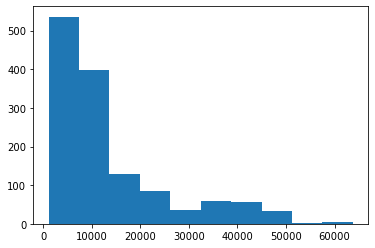

In [4]:
# Distribution of the target class 
medicalCost = df1[['medicalCost']].to_numpy()

plt.hist(medicalCost)
plt.show() 

The medical cost is the targeted class. A supervised method is more suitable for predicting medical cost as the values of the target variable is known. Since the target variable is a continuous variable, regression analysis is better for the predicting medical cost rather than classification. Additionaly, for classification classes has to introduced to the medical cost variable and clustering mostly done when the target class is unknown.


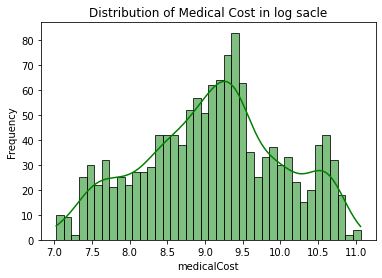

In [5]:
# Distribution of the log transformation of the target class
sns.histplot(np.log(df1['medicalCost']),bins=40,color='green', stat='count', kde=True)
plt.ylabel('Medical Cost in log sacle')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Cost in log sacle')
plt.show()

Medical cost is highly skewed, threfore, log scale is used to visualise data inorder to extract features of the densed area of the distribution.
Log scale values of the medical cost shows distribution colser to a normal distribution.


In [6]:
# Percentage of values missing in each column
for column in df1.columns:
    percentage = df1[column].isnull().mean()
    print(f'{column}: {round(percentage*100,4)}%')

age: 0.0%
sex: 0.0%
bmi: 0.0%
children: 0.0%
smoker: 0.0%
region: 0.0%
medicalCost: 0.0%


Analysis of missing values found that there are no missing values in the dataset

In [7]:
print('Table 1: Basic statistics of the continous variables')
df1.describe()


Table 1: Basic statistics of the continous variables


,age,bmi,children,medicalCost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


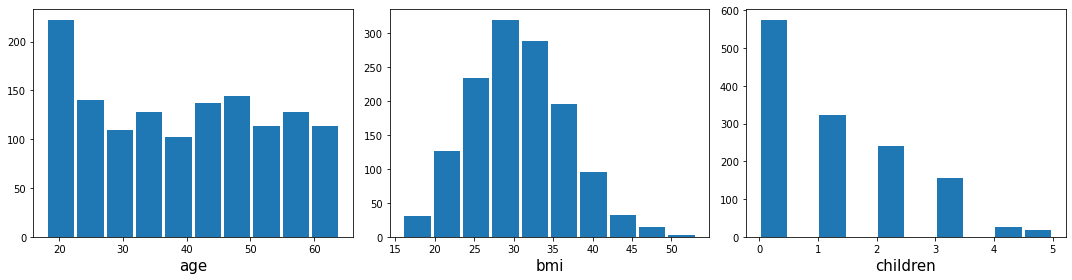

Figure 3: Distribution of the continous variables


In [8]:
# Distribution of the continous variables
fig, ax = plt.subplots(1, 3, figsize = (15, 4))

plt.subplot(1, 3, 1)
plt.hist(df1.iloc[:, 0], rwidth = 0.9)
plt.xlabel(df1.columns[0], fontsize = 15)

plt.subplot(1, 3, 2)
plt.hist(df1.iloc[:, 2], rwidth = 0.9)
plt.xlabel(df1.columns[2], fontsize = 15)

plt.subplot(1, 3, 3)
plt.hist(df1.iloc[:, 3], rwidth = 0.9)
plt.xlabel(df1.columns[3], fontsize = 15)
plt.tight_layout()
plt.show()
print('Figure 3: Distribution of the continous variables')

Figure 3 shows the distribution of the continuous variables. Age distribution is showing a closely uniform distribution with a higher bar at age 20. This shows that there are more observation recorded for age around 20 with minimum 18 and maximum 64 when compaired to the Table 1.

Bmi shows a unimodal normal distribution with mean 30.6. Values lies from 15.96 to 53.13 and standard deviation of 6.0. This shows most people are in unhealthy range of Bmi as per the NHS guide lines(2022).

Number of children per individual is declining sharply with the number of children. There are close to 600 individuals with no children and little over 300 individuals with one child and only 18 individuals with five children. The mean of the distribution is 1.09, with minimum 0 and maximum 5 suggesting a highly skewed diatribution

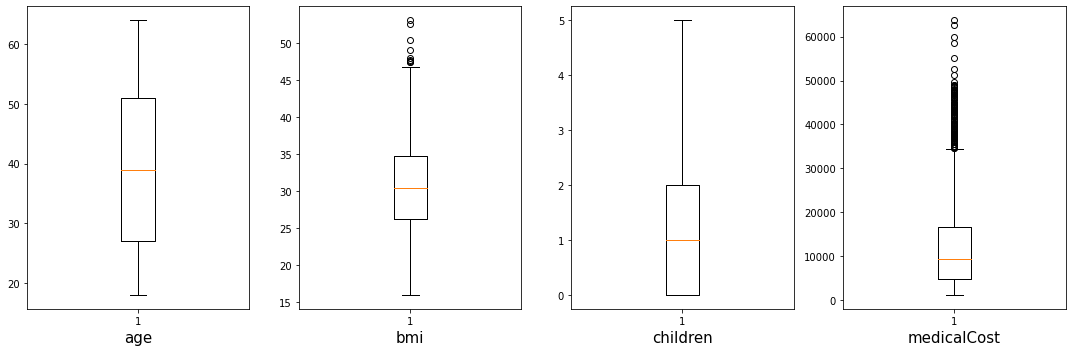

Figure 4: Boxplot of the continous variables


In [9]:
# Boxplot of the continous variables
fig, ax = plt.subplots(1, 4, figsize = (15, 5))

plt.subplot(1, 4, 1)
plt.boxplot(df1[['age']])
plt.xlabel(df1.columns[0], fontsize = 15)

plt.subplot(1, 4, 2)
plt.boxplot(df1[['bmi']])
plt.xlabel(df1.columns[2], fontsize = 15)

plt.subplot(1, 4, 3)
plt.boxplot(df1[['children']])
plt.xlabel(df1.columns[3], fontsize = 15)

plt.subplot(1, 4, 4)
plt.boxplot(df1[['medicalCost']])
plt.xlabel(df1.columns[6], fontsize = 15)

plt.tight_layout()
plt.show()
print('Figure 4: Boxplot of the continous variables')

Figure 4 shows that the age variable has more balanced distribution and no outliers. Bmi is also a balanced distribution, however, has outlires at the higher end of the distribution.Number of children variable has no outliers but there are more individuals with low number of children than high number of children as can be seen in histograms of Figure 3.

The target variable medical cost has more low cost values than high cost values. There are lot of outliers at the higher end and few outliers are exists over 50000. 

In [10]:
# Extreme outliers are analised more closely. 
df1[df1['medicalCost'] > 50000]

,age,sex,bmi,children,smoker,region,medicalCost
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


There are no clear pattern or prominent features identifiable from this outliers of the medical cost variable. Therefore, they are not dropped from the analysis. These values can result from accident or emergency sergeries, so they might add value to the analysis.

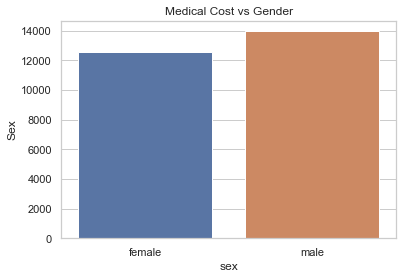

Figure 5: Medical cost vs Gender


In [11]:
# Bar chart of medical cost vs gender
sns.set_theme(style="whitegrid")
sns.barplot(x='sex', y='medicalCost', data=df1, ci=None)
plt.ylabel('Medical Cost')
plt.ylabel('Sex')
plt.title('Medical Cost vs Gender')
plt.show()
print('Figure 5: Medical cost vs Gender')

According to the figure 5, Even though, males has higher medical cost recorded aroung 14000, there are significant difference with the gender as females have medical cost recorded around 13000.

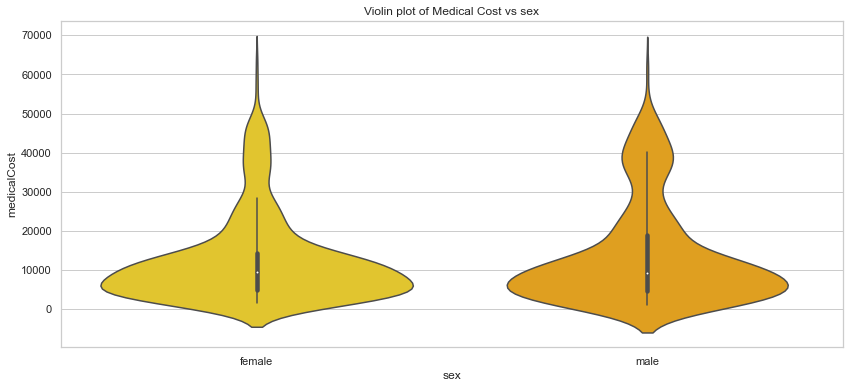

Figure 6: Violin plot of Medical Cost vs Gender


In [12]:
# Violin plot of medical cost vs gender
f = plt.figure(figsize=(14,6))

sns.violinplot(x='sex', y='medicalCost',data=df1,palette='Wistia')
plt.title('Violin plot of Medical Cost vs sex')
plt.show()
print('Figure 6: Violin plot of Medical Cost vs Gender')

Figure 6 shows that there are more males in higher range of medical costs thean females. For lower range around zero to 20000, distribution shows approximately same number of individuals for male and females.

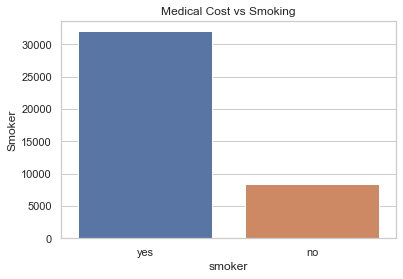

Figure 7: Medical Cost vs Smoking


In [13]:
# Bar chart of medical cost vs smoking
sns.set_theme(style="whitegrid")
sns.barplot(x='smoker', y='medicalCost', data=df1, ci=None)
plt.ylabel('Medical Cost')
plt.ylabel('Smoker')
plt.title('Medical Cost vs Smoking')
plt.show()
print('Figure 7: Medical Cost vs Smoking')

According to figure 7, it is clear that the smoking individuals have spent more on medical cost. This graph shows drastic difference in medical cost for smoking and non-smoking individuals.

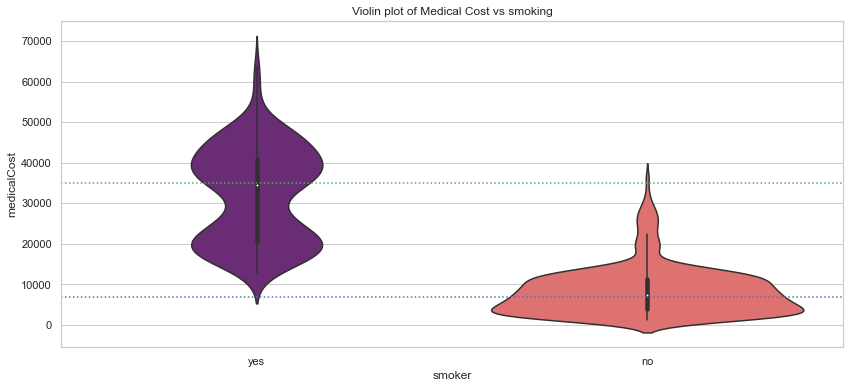

Figure 8: Violin plot of Medical Cost vs smoking


In [14]:
# Violin plot of medical cost vs smoking
f = plt.figure(figsize=(14,6))

sns.violinplot(x='smoker', y='medicalCost',data=df1, palette='magma');
plt.title('Violin plot of Medical Cost vs smoking')
plt.axhline(y=35000, color='g', linestyle='dotted')
plt.axhline(y=7000, color='b', linestyle='dotted')

plt.show()
print('Figure 8: Violin plot of Medical Cost vs smoking')


Figure 8 shows that the medical cost for smokers is much wide range compare to non smokers. It is clear also that the highest value of medical cost for non smoking person is aroung 40000, and most values distributed below 20000; while for smoking person medical cost goes over 60000, majority of the records lie between 15000 to 50000. Average Medical cost for non smoker is approximately 7000, for smoker the minimum medical cost is around 7000. Higest value of medical cost for non smoking individual and mean value for smoking individual lie very closly. These observasions shows that there is significat difference in medical cost for smoking and non-smoking person.

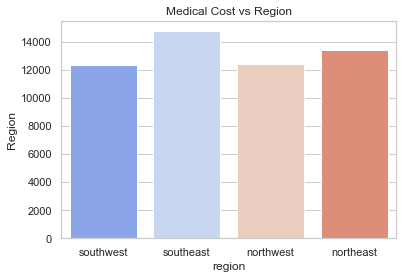

Figure 9: Medical Cost vs Region


In [15]:
sns.set_theme(style="whitegrid")
sns.barplot(x='region', y='medicalCost', data=df1,palette = 'coolwarm', ci=None)
plt.ylabel('Medical Cost')
plt.ylabel('Region')
plt.title('Medical Cost vs Region')
plt.show()
print('Figure 9: Medical Cost vs Region')


Medical cost does not show much difference with the regeion. Southeast shows slightly higher value for the medical cost and northeast shows lowest value. 

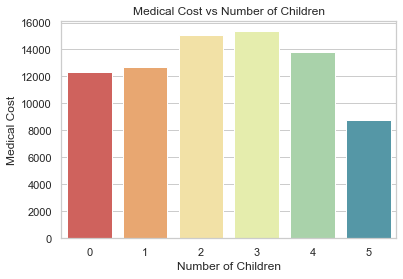

Figure 10: Medical Cost vs Number of children


In [16]:
sns.set_theme(style="whitegrid")
sns.barplot(x='children', y='medicalCost', data=df1,palette='Spectral', ci=None)
plt.ylabel('Medical Cost')
plt.xlabel('Number of Children')
plt.title('Medical Cost vs Number of Children')
plt.show()
print('Figure 10: Medical Cost vs Number of children')


Medical cost vs number of children shows that individuals with two and three children spends more on the medical costs than other groups. Lowest value for medical cost resulted from individuals with five children.

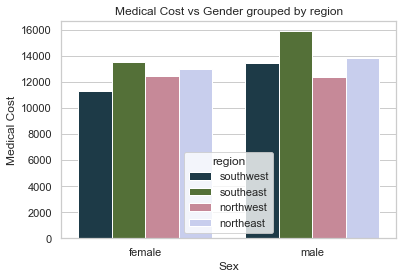

Figure 11: Medical Cost vs Gender grouped by region


In [17]:
sns.set_theme(style="whitegrid")
sns.barplot(x='sex', y='medicalCost', hue='region', data=df1, palette='cubehelix', ci=None)
plt.ylabel('Medical Cost')
plt.xlabel('Sex')
plt.title('Medical Cost vs Gender grouped by region')
plt.show()
print('Figure 11: Medical Cost vs Gender grouped by region')


Medical cost for gender when grouped by region shows the highest fot southeast same as the graph for whole population in figure 9. However, in contrast to figure 9, lowest for females recorded from southwest, while lowest for males recrded from northwest as same as figure 9.

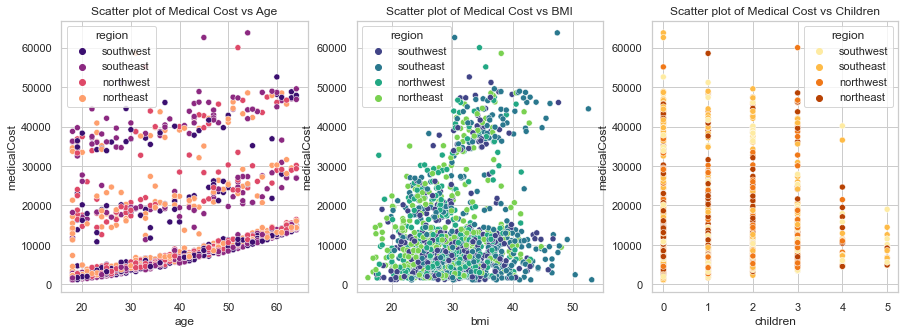

Figure 12: Medical Cost vs Cotinous variables and region


In [18]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(131)
sns.scatterplot(x='age',y='medicalCost',data=df1,palette='magma',hue='region',ax=ax)
ax.set_title('Scatter plot of Medical Cost vs Age')

ax = f.add_subplot(132)
sns.scatterplot(x='bmi',y='medicalCost',data=df1,palette='viridis',hue='region')
ax.set_title('Scatter plot of Medical Cost vs BMI')

ax = f.add_subplot(133)
sns.scatterplot(x='children',y='medicalCost',data=df1,palette='YlOrBr',hue='region')
ax.set_title('Scatter plot of Medical Cost vs Children')
plt.show()

print('Figure 12: Medical Cost vs Cotinous variables and region')


Medical cost are getting higher with age according to the figure 12, there are three separate regions for medical spending when plotter with age. Further analysis can be done to identify any factors affecting this separation. Bmi values for highest medical costs are lie towords highes end there are not many high medical cost recrds in the lower bmis. However, there are no clear patterns visible with the bmi and medical cost. As discussed when analysing figure 10, individuals with five children shows lower values for medical costs. Highest numbers are recorded with individuals with no children.

Scatter plots does not show any identifiable pattern with the region in any of the plots.

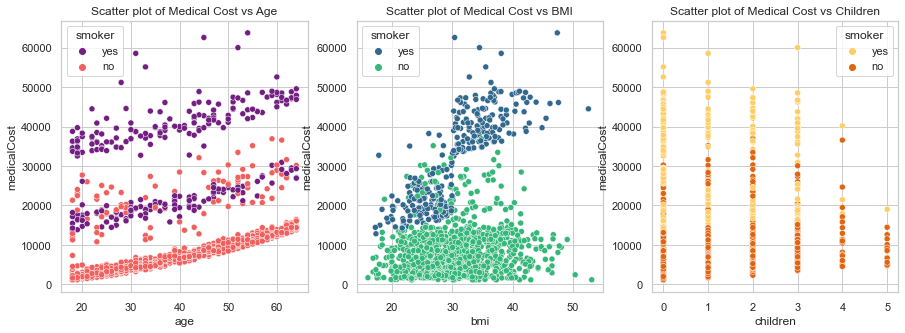

Figure 13: Medical Cost vs Cotinous variables and smoking


In [19]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(131)
sns.scatterplot(x='age',y='medicalCost',data=df1,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Medical Cost vs Age')

ax = f.add_subplot(132)
sns.scatterplot(x='bmi',y='medicalCost',data=df1,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Medical Cost vs BMI')

ax = f.add_subplot(133)
sns.scatterplot(x='children',y='medicalCost',data=df1,palette='YlOrBr',hue='smoker')
ax.set_title('Scatter plot of Medical Cost vs Children')
plt.show()

print('Figure 13: Medical Cost vs Cotinous variables and smoking')

Figure 13 shows the band apears in medical cost vs age relates to smoking. The lowest band only has non-smoking individuals. Middel band has both smoking and non-smoking individuals while upper ban has only smoking individuals. Other two graphs also show more smoling indiividuals at the higher end of the graph. 

### Transform categorical varibles to numerical

In [20]:
# Lable encoding for smoker and sex variables
df1.loc[df1['smoker'] == 'yes', 'smoker_nu'] = 1
df1.loc[df1['smoker'] == 'no', 'smoker_nu'] = 0
df1.loc[df1['sex'] == 'female', 'sex_nu'] = 1
df1.loc[df1['sex'] == 'male', 'sex_nu'] = 0
df1.head()

,age,sex,bmi,children,smoker,region,medicalCost,smoker_nu,sex_nu
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,0.0


In [21]:
# Dummy variable introduced for region variable
df1_encode = pd.get_dummies(data = df1, prefix = 'RE', prefix_sep='_',
               columns = ['region'],
               drop_first =False,
              dtype='int8')

### Correlation

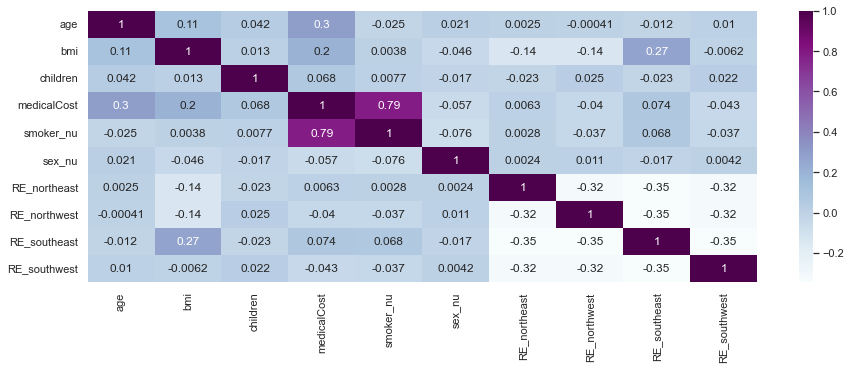

Figure 14: Correlation plot


In [22]:
plt.figure(figsize=(15,5))

# plot the heatmap
# Since there are outliers spearman correlation was used here.
sns.heatmap(df1_encode.corr(method='pearson'), 
        cmap='BuPu',
        annot= True)
plt.show()
print('Figure 14: Correlation plot')


Crrelation analysis shows highest corelation with smoker column and second highers for age column and third for bmi. Smoker variable shows a strong positive correlation with 0.79. Age and bmi shows week positive correlation with 0.3 and 0.2. All the other variables are showing almost no correlation with correlation coeficient less than 0.1. Therfore age, smoker and bmi is identified as best three predictors for the medical cost.

In [23]:
df1_encode

,age,sex,bmi,children,smoker,medicalCost,smoker_nu,sex_nu,RE_northeast,RE_northwest,RE_southeast,RE_southwest
0,19,female,27.900,0,yes,16884.92400,1.0,1.0,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0.0,0.0,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0.0,0.0,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0.0,0.0,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,0.0,0.0,0,1,0,0
1334,18,female,31.920,0,no,2205.98080,0.0,1.0,1,0,0,0
1335,18,female,36.850,0,no,1629.83350,0.0,1.0,0,0,1,0
1336,21,female,25.800,0,no,2007.94500,0.0,1.0,0,0,0,1


### Simple linear models to predict medical cost

#### Simple linear model to predict medical cost with age

In [24]:
x1 = df1_encode[['age']]
y = df1_encode[['medicalCost']]
x1_train, x1_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.2, random_state=3)
model = LinearRegression()
model.fit(x1_train,y_train)
r_sq = model.score(x1_train, y_train)
print(f'coefficient of determination: {r_sq}')
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')
y_pred = model.predict(x1_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

coefficient of determination: 0.08919404064482284
intercept: [3089.27775168]
slope: [[258.24833494]]
Mean squared error: 137276316.90775076
R-squared: 0.08984531343011881


The model has R-squared 0.08 which suggest the dependent variable does not explain the variation of the indipendent variable properly, as R-squared is closer to 0 than 1. Slope of 258 shows that for each year increased of age there is 258 increase in medical cost. Mean squared error is equals to 137,276,316 a fairly large value. As figure 15 shows, the three band of medical costs are had to predict when using simple regression.

### -P value-

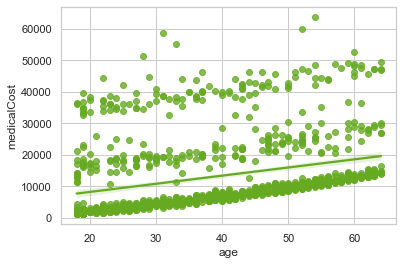

Figure 15: regression line for medical cost and age


In [25]:
sns.regplot(x=x1_train, y=y_train, color = '#66AA22');
plt.show()
print('Figure 15: regression line for medical cost and age')


#### Simple linear model to predict medical cost with smoker

In [26]:
x1 = df1_encode[['smoker_nu']]
y = df1_encode[['medicalCost']]
x1_train, x1_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.2, random_state=3)
model = LinearRegression()
model.fit(x1_train,y_train)
r_sq = model.score(x1_train, y_train)
print(f'coefficient of determination: {r_sq}')
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')
y_pred = model.predict(x1_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

coefficient of determination: 0.6162667489541495
intercept: [8433.799658]
slope: [[23506.57981273]]
Mean squared error: 55347801.452357695
R-squared: 0.6330389537107518


The model has R-squared 0.6 which is slightly a better prediction closer to the middle value between 0 and 1. Here slope does not hold much information as the dependent variable is binary variable. Mean squared error is equals to 55,347,801 a fairly large value. Figure 16 shows a regression line fitted to the data. 

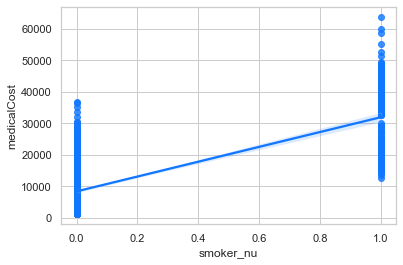

Figure 16: regression line for medical cost and smoker


In [27]:
sns.regplot(x=x1_train, y=y_train, color = '#1177FF');
plt.show()
print('Figure 16: regression line for medical cost and smoker')


#### Simple linear model to predict medical cost with bmi

In [28]:
x1 = df1_encode[['bmi']]
y = df1_encode[['medicalCost']]
x1_train, x1_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.2, random_state=3)
model = LinearRegression()
model.fit(x1_train,y_train)
r_sq = model.score(x1_train, y_train)
print(f'coefficient of determination: {r_sq}')
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')
y_pred = model.predict(x1_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

coefficient of determination: 0.03789460176473547
intercept: [1310.83699573]
slope: [[387.33454902]]
Mean squared error: 144140190.02346116
R-squared: 0.04433719939408365


The model has R-squared 0.04 which suggest the model does not predict medical cost well as it is closer to 0 than 1. Slope shows a 387 increase in medical cost for a unit increse in bmi. Mean squared error is equals to 144,140,190 a fairly large value. Figure 17 shows that there are lot of observation lie fairly far away from the regression line towards the higher values of bmi.

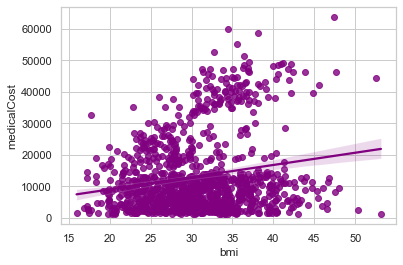

Figure 17: regression line for medical cost and bmi


In [29]:
sns.regplot(x=x1_train, y=y_train, color = 'purple');
plt.show()
print('Figure 17: regression line for medical cost and bmi')

Overall, smoker variable has better performance when compaired R-squared value and mean sequared error.

### Multivariate regression models to predict medical cost

#### Multivariate regression model to predict medical cost with age, smoker and bmi.

In [30]:
# Dropping all the variables except three highest correlated variables.
x1 =df1_encode.drop(columns=['sex', 'smoker', 'medicalCost','sex_nu','RE_northeast', 'RE_northwest', 'RE_southeast','RE_southwest','children'])
y = df1_encode[['medicalCost']]
x1_train, x1_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.2, random_state=3)
model = LinearRegression()
model.fit(x1_train,y_train)
r_sq = model.score(x1_train, y_train)
print(f'coefficient of determination: {r_sq}')
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')
y_pred = model.predict(x1_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

coefficient of determination: 0.7487255284553438
intercept: [-12297.07065608]
slope: [[  265.48317257   333.28328133 23817.80914975]]
Mean squared error: 38904433.375912696
R-squared: 0.7420600059569823


The multivariate model with all three variables have lower Mean squared error than simple linear models with each of them. Where model with age has 137,276,316, model with smoker has 55,347,801, model with bmi has 144,140,190 and the model with all three variable has 38,904,433, which is better value than the best simple leanier model. 

R-squared value also shows the similar result with 0.74 for the multivariate model with three variables which is much closer to 1 than 0. Slopes for each variable stays closer to the linear models.

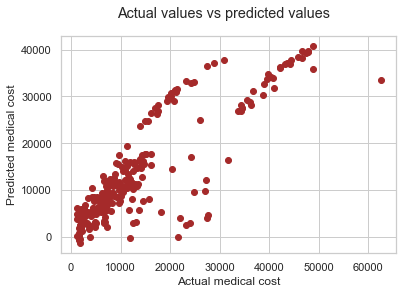

Figure 18: Actual value vs predicted value plot for multivariate model with age, bmi and smoker variables as independent variables


In [31]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred,color = 'brown')
fig.suptitle('Actual values vs predicted values')
plt.ylabel('Predicted medical cost')
plt.xlabel('Actual medical cost')
plt.show()
print('Figure 18: Actual value vs predicted value plot for multivariate model with age, bmi and smoker variables as independent variables')       

Figure 18 shows the higher values are predicted for higher actual values. However, in range 10000 to 30000 of medical costs, there seems to have wider range of predicted values distributed from around zero to closer to 40000. These are the values introduced more error in to the model. Lower values of medical cost also have a good prediction.

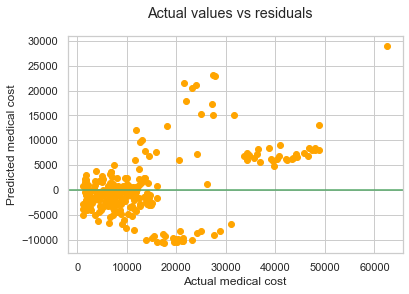

Figure 19: residual plot for multivariate model with age, bmi and smoker variables as independent variables


In [32]:
fig, ax = plt.subplots()
ax.scatter(y_test,(y_test- y_pred),color = 'orange')
plt.axhline(y=0.0, color='g', linestyle='-')
fig.suptitle('Actual values vs residuals')
plt.ylabel('Predicted medical cost')
plt.xlabel('Actual medical cost')
plt.show()   
print('Figure 19: residual plot for multivariate model with age, bmi and smoker variables as independent variables')       

The residual plot in figure 19 also confirms the results of figure 18, in the mid range, there are higher variation of residual values. It is also clear from figure 19 that the values over 60000 has resulted the largest residual of the model.

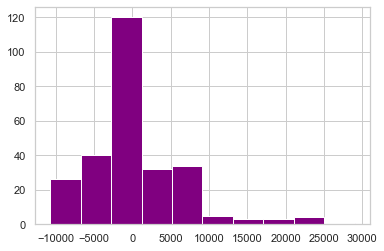

Figure 20: Histogram of residuals for multivariate model with age, bmi and smoker variables as independent variables


In [33]:
residuals = (y_test- y_pred)

plt.hist(residuals,color='purple')
plt.show() 
print('Figure 20: Histogram of residuals for multivariate model with age, bmi and smoker variables as independent variables')       

The histogram in figure 20 shows that the distribution of residuals is skewed. There are more zero or negative values than positive values. It is also clear there is a long tail towards positive end having larger positive residuals than negative residuals. 

#### Multivariate regression model to predict medical cost all the variables.

In [34]:
x1 =df1_encode.drop(columns=['sex', 'smoker', 'medicalCost'])
y = df1_encode[['medicalCost']]
x1_train, x1_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.2, random_state=3)
model = LinearRegression()
model.fit(x1_train,y_train)
r_sq = model.score(x1_train, y_train)
print(f'coefficient of determination: {r_sq}')
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')
y_pred = model.predict(x1_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

coefficient of determination: 0.7534063569267673
intercept: [-13394.85664336]
slope: [[  262.31558491   349.53918186   574.50846193 23827.48548329
    222.45944647   625.80325666   204.49787511  -537.19360189
   -293.10752988]]
Mean squared error: 39202908.26059815
R-squared: 0.7400810898464749


The model has 0.74 R-squared error which shows a good prediction for the medical cost. The multivariate reggression model with all the variables is performing closer to the multivariate model with three best variables. The performance here is slighly reduced than the model with three variable when comapring R-squared value and mean squared error.

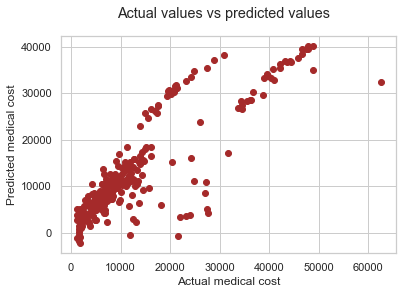

Figure 21: Actual value vs predicted value plot for multivariate model with age, bmi and smoker variables as independent variables


In [35]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred, color = 'brown')
plt.ylabel('Predicted medical cost')
plt.xlabel('Actual medical cost')
fig.suptitle('Actual values vs predicted values')
plt.show()
print('Figure 21: Actual value vs predicted value plot for multivariate model with age, bmi and smoker variables as independent variables')       

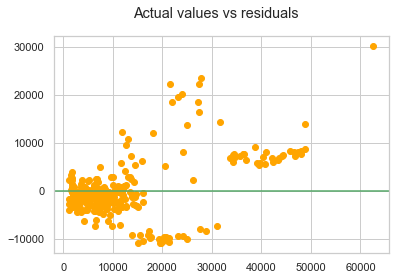

Figure 22: residual plot for multivariate model with all the variavles as independent variables


In [36]:
fig, ax = plt.subplots()
ax.scatter(y_test,(y_test- y_pred),color = 'orange')
plt.axhline(y=0.0, color='g', linestyle='-')
fig.suptitle('Actual values vs residuals')
plt.show() 
print('Figure 22: residual plot for multivariate model with all the variavles as independent variables')       

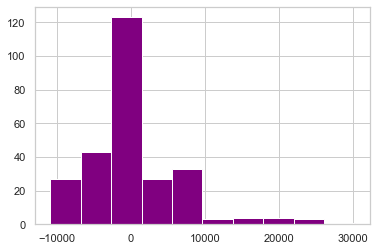

Figure 23: Histogram of residuals for multivariate model with age, bmi and smoker variables as independent variables


In [37]:
residuals = (y_test- y_pred)

plt.hist(residuals,color='purple')
plt.show()
print('Figure 23: Histogram of residuals for multivariate model with age, bmi and smoker variables as independent variables')       

Actual value vs predicted value plot in figure, actual values vs residuals in figure 22 and the distribution of the residuals in figure 23, shows almost similar results as the respective plot for the multivariate model with best three predicters. Highest positive error value seems slightly higher in the model with all the variables in it than the model with only the three best predictors. 

Overall, it is clear from the above results that the multivariate regression model with three best predictors predicts medical cost better than all the other four models trained in this task. Given the time taken to train the model a model using all of the variable and best correlated variables, and that compared with accuracy of the prediction, the model with best predictores chosen based on correlation seem the best choice.

# Question 2. Census Income

### Introduction

The dataset contains US census data and the task is to predict weather given individual is earning more than $50000 or more. The data set is labled and contain two classes. Three machine learning models and two artificial neural network model is used to predic the income of a individual.

### Data Understanding and Preperration

Distribution of the data, type of the data, missing values, number of unique values in the data is analysed. Missing values are imputed based on the distribution of the data. Correlation is used to understand relationship of the variables.

Lable encoding, One hot encoding is used to transform categorical data and scaling is done before using data in the machine learning models.

In [68]:
df2 = pd.read_csv('CensusDB.csv',na_values=['?'])
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States,<=50K


In [69]:
print('Number of rows and columns in the dataset: ',df2.shape)
print('There are six continous variables and eight categorical variables.')

Number of rows and columns in the dataset:  (32561, 14)
There are six continous variables and eight categorical variables.


In [70]:
df2.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [71]:
# Percentage of values missing in each column
for column in df2.columns:
    percentage = df2[column].isnull().mean()
    print(f'{column}: {round(percentage*100,4)}%')

age: 0.0%
workclass: 5.6386%
fnlwgt: 0.0%
education: 0.0%
education-num: 0.0%
marital-status: 0.0%
occupation: 5.6601%
relationship: 0.0%
sex: 0.0%
capital-gain: 0.0%
capital-loss: 0.0%
hours-per-week: 0.0%
native-country: 1.7905%
income: 0.0%


There are missing values present in the dataset. According to the distribution of the variables, missing values should be imputed as there are only three missing values per row at maximum, dropping the row is disadvantage to the analysis, because it deletes the information of the other variables.

In [72]:
max_missing = 0
# Count of missing values across rows
for i in range(len(df2.index)):
    missing_current_row = df2.iloc[i].isnull().sum()
    if(max_missing < missing_current_row):
        max_missing = missing_current_row

print('maximum null values in a row : ', max_missing,
      '\nTherefore, dropping rows containing missing values are disadvantageous. Dropping the entire rows not consedered as it delete data of the other 11 rows')
print()

maximum null values in a row :  3 
Therefore, dropping rows containing missing values are disadvantageous. Dropping the entire rows not consedered as it delete data of the other 11 rows



Figure 2.1: Number of observations representing each value of the income label


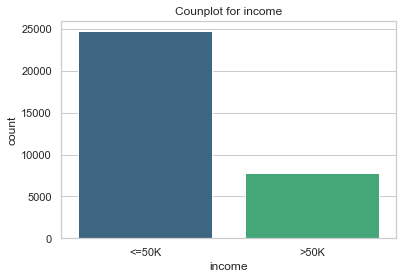

In [73]:
sns.countplot(x='income', palette = 'viridis',data = df2);
print('Figure 2.1: Number of observations representing each value of the income label')
plt.title('Counplot for income')
plt.show() 


Figure 2.1 shows the target class does not have balanced number of obervation for each label of the target class. The models should be evaluated depending on this to get better performance out of unbalanced dataset.

In [74]:
df2.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


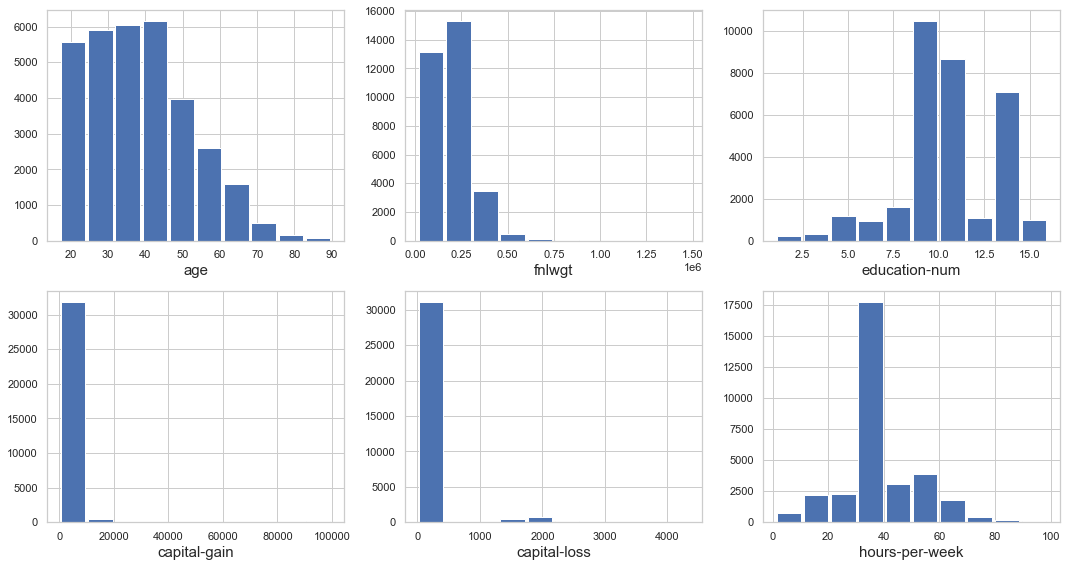

Figure 2.2: Distribution of the continous variables


In [75]:
fig, ax = plt.subplots(2, 3, figsize = (15, 8))

plt.subplot(2, 3, 1)
plt.hist(df2.iloc[:, 0], rwidth = 0.9)
plt.xlabel(df2.columns[0], fontsize = 15)

plt.subplot(2, 3, 2)
plt.hist(df2.iloc[:, 2], rwidth = 0.9)
plt.xlabel(df2.columns[2], fontsize = 15)

plt.subplot(2, 3, 3)
plt.hist(df2.iloc[:, 4], rwidth = 0.9)
plt.xlabel(df2.columns[4], fontsize = 15)

plt.subplot(2, 3, 4)
plt.hist(df2.iloc[:, 9], rwidth = 0.9)
plt.xlabel(df2.columns[9], fontsize = 15)

plt.subplot(2, 3, 5)
plt.hist(df2.iloc[:, 10], rwidth = 0.9)
plt.xlabel(df2.columns[10], fontsize = 15)

plt.subplot(2, 3, 6)
plt.hist(df2.iloc[:, 11], rwidth = 0.9)
plt.xlabel(df2.columns[11], fontsize = 15)

plt.tight_layout()
plt.show()
print('Figure 2.2: Distribution of the continous variables')

All the distributions are uneven distributions. Specialy, Capital gain and Capital loss are highly skewed as can be seen in boxplot in Figure 2.2.

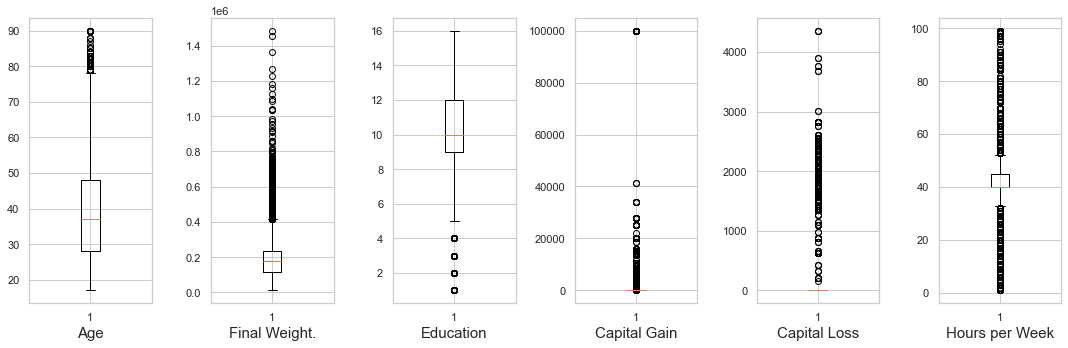

Figure 2.3: Boxplot of the continous variables


In [76]:
# Boxplot of the continous variables
fig, ax = plt.subplots(1, 6, figsize = (15, 5))

plt.subplot(1, 6, 1)
plt.boxplot(df2[['age']])
plt.xlabel('Age', fontsize = 15)

plt.subplot(1, 6, 2)
plt.boxplot(df2[['fnlwgt']])
plt.xlabel('Final Weight.', fontsize = 15)

plt.subplot(1, 6, 3)
plt.boxplot(df2[['education-num']])
plt.xlabel('Education', fontsize = 15)

plt.subplot(1, 6, 4)
plt.boxplot(df2[['capital-gain']])
plt.xlabel('Capital Gain', fontsize = 15)

plt.subplot(1, 6, 5)
plt.boxplot(df2[['capital-loss']])
plt.xlabel('Capital Loss', fontsize = 15)

plt.subplot(1, 6, 6)
plt.boxplot(df2[['hours-per-week']])
plt.xlabel('Hours per Week', fontsize = 15)

plt.tight_layout()
plt.show()
print('Figure 2.3: Boxplot of the continous variables')

A boxplot is used to identify outliers. From figure 2.3, it is clear that all the continous variables have outliers. Age, Final Weight has outliers at the higher end of the distribution. Education has outliers at the lower end. Other three variables have outliers at both sides.

This analysis suggest that capital-gain variable has extrem values at 99999. Observations with these values are dropped as it is seems errornous data and not clear how to validate the data with given information. 

In [77]:
df2.drop(df2[df2['capital-gain'] >= 60000].index, inplace = True)

In [78]:
freq_table = pd.crosstab(df2['workclass'], df2['income'])
freq_table

income,<=50K,>50K
workclass,,
Federal-gov,589,370
Local-gov,1476,611
Never-worked,7,0
Private,17733,4881
Self-emp-inc,494,586
Self-emp-not-inc,1817,695
State-gov,945,352
Without-pay,14,0


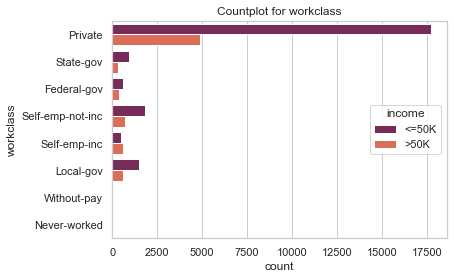

Figure 2.4: Countplot for Workclass


In [79]:
sns.set_theme(style="whitegrid")
sns.countplot(y='workclass', hue='income', palette = 'rocket', data = df2);
plt.title('Countplot for workclass')
plt.show() 
print('Figure 2.4: Countplot for Workclass') 

There are more low income individuals and less high income individuals are visible in all the classes. In private workclass category the differance is significantly large.

In [80]:
df2['workclass'] = df2['workclass'].fillna(df2['workclass'].mode()[0])

In [81]:
freq_table = pd.crosstab(df2['occupation'], df2['income'])
freq_table

income,<=50K,>50K
occupation,,
Adm-clerical,3263,501
Armed-Forces,8,1
Craft-repair,3170,921
Exec-managerial,2098,1926
Farming-fishing,879,115
Handlers-cleaners,1284,85
Machine-op-inspct,1752,249
Other-service,3158,135
Priv-house-serv,148,1


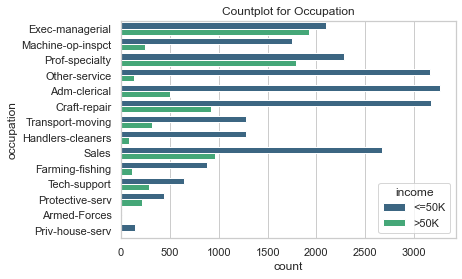

Figure 2.5: Countplot for Occupation


In [82]:
sns.countplot(y='occupation', hue='income', palette = 'viridis',data = df2);
plt.title('Countplot for Occupation')
plt.show() 
print('Figure 2.5: Countplot for Occupation') 

The same pattern of more low income individuals and less high income individuals are visible in all the classes. However, for Executive Managerial category and Profecianal Speciality categories have little difference in the two groups.

In [83]:
df2['occupation'] = df2['occupation'].fillna(df2['occupation'].mode()[0])

In [84]:
len(df2['native-country'].unique())

42

There are too many unique values in the native countries variable, in order to reduce diamentiality, there values are categorised base on geohraphical location.

In [85]:
freq_table = pd.crosstab(df2['native-country'], df2['income'])
freq_table

income,<=50K,>50K
native-country,,
Cambodia,12,7
Canada,82,38
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,1
Ecuador,24,4
El-Salvador,97,9
England,60,30


In [86]:
df2['native-country'] = df2['native-country'].fillna('Other')

The missing values in the native countries have imputed with value 'other'. All the other wrong country names are categorised as 'other' in the next step and depending on the region other native countries are separated in to groups.

In [87]:
# Age grouping using mean values
df2.loc[df2['native-country'] == 'Cambodia', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'China', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Vietnam', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Thailand', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Taiwan', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Philippines', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Japan', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Hong', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'India', 'native-country'] = 'Asia'
df2.loc[df2['native-country'] == 'Iran', 'native-country'] = 'Asia'


df2.loc[df2['native-country'] == 'Portugal', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Poland', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Italy', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Ireland', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Holand-Netherlands', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Greece', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Germany', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'France', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'England', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Scotland', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Yugoslavia', 'native-country'] = 'Europe'
df2.loc[df2['native-country'] == 'Hungary', 'native-country'] = 'Europe'


df2.loc[df2['native-country'] == 'Trinadad&Tobago', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Puerto-Rico', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Peru', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Nicaragua', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Mexico', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Jamaica', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Honduras', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Haiti', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Guatemala', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'El-Salvador', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Ecuador', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Dominican-Republic', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Cuba', 'native-country'] = 'America'
df2.loc[df2['native-country'] == 'Columbia', 'native-country'] = 'America'

df2.loc[df2['native-country'] == 'South', 'native-country'] = 'Other'
df2.loc[df2['native-country'] == 'Laos', 'native-country'] = 'Other'
df2.loc[df2['native-country'] == 'Outlying-US(Guam-USVI-etc)', 'native-country'] = 'Other'

In [88]:
pd.crosstab(df2['native-country'], df2['income'])

income,<=50K,>50K
native-country,,
America,1290,109
Asia,449,198
Canada,82,38
Europe,369,152
Other,531,156
United-States,21999,7029


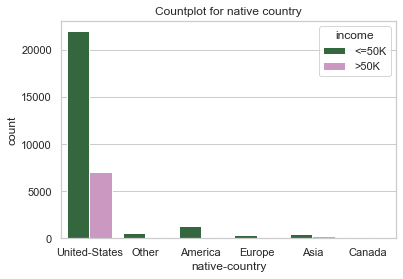

Figure 2.6: Countplot for grouped Native Country


In [89]:
sns.countplot(x='native-country', hue='income', palette = 'cubehelix', data = df2)
plt.title('Countplot for native country')
plt.show() 
print('Figure 2.6: Countplot for grouped Native Country') 

The Native country has most obsevations for United States. There are only small amount of observations ate recorded for other countries. The bar for low income than 50000 dollars are prominent in all the countries.

#### Transforming categorical variables with lable encoding and OneHot encoding

In [90]:
# Lable encoding sex, income
# Because there are only two classes in the below two variables, label encoding is used
df2.loc[df2['sex'] == 'Female', 'sex_nu'] = 1
df2.loc[df2['sex'] == 'Male', 'sex_nu'] = 0

df2.loc[df2['income'] == '<=50K', 'income_nu'] = 1
df2.loc[df2['income'] == '>50K', 'income_nu'] = 0

In [91]:
# Dummy variable
# Because there are sevaral values of native country, workclass, marital-status, occupation and relationship, and has no ordering, OneHot encoding is used
df2= pd.get_dummies(data = df2, prefix = 'country', prefix_sep='_', columns = ['native-country'],drop_first =False, dtype='int8')
df2= pd.get_dummies(data = df2, prefix = 'wc', prefix_sep='_', columns = ['workclass'],drop_first =False, dtype='int8')
df2= pd.get_dummies(data = df2, prefix = 'ms', prefix_sep='_', columns = ['marital-status'],drop_first =False, dtype='int8')
df2= pd.get_dummies(data = df2, prefix = 'oc', prefix_sep='_', columns = ['occupation'],drop_first =False, dtype='int8')
df2= pd.get_dummies(data = df2, prefix = 're', prefix_sep='_', columns = ['relationship'],drop_first =False, dtype='int8')

In [92]:
# Dropp categorical values as they have transformed into other variables
df2= df2.drop(['education','sex'], axis=1)

#### Correlation analysis

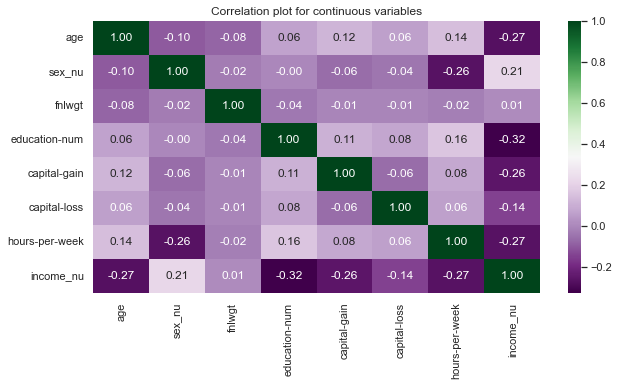

Figure 2.7: Correlation plot for continuous variables


In [93]:
plt.figure(figsize=(10,5))
sns.heatmap(df2[['age','sex_nu', 'fnlwgt', 'education-num', 'capital-gain','capital-loss','hours-per-week','income_nu']].corr(method='spearman'),
 annot=True, fmt='.2f', cmap='PRGn');
plt.title('Correlation plot for continuous variables')
plt.show() 
print('Figure 2.7: Correlation plot for continuous variables') 

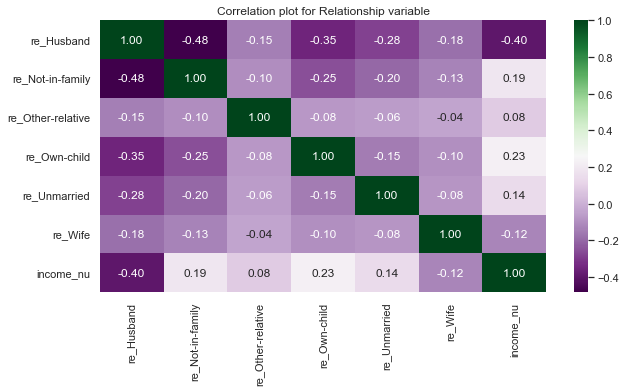

Figure 2.8: Correlation plot for Relationshio variable


In [94]:
plt.figure(figsize=(10,5))
sns.heatmap(df2[['re_Husband','re_Not-in-family', 're_Other-relative', 're_Own-child', 're_Unmarried','re_Wife','income_nu']].corr(method='spearman'),
 annot=True, fmt='.2f', cmap='PRGn');
plt.title('Correlation plot for Relationship variable')
plt.show() 
print('Figure 2.8: Correlation plot for Relationshio variable') 

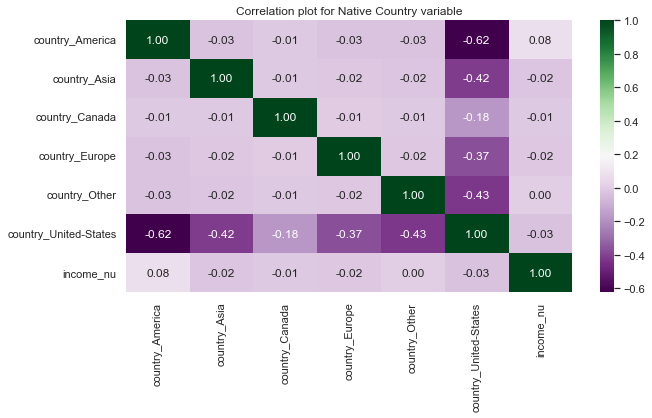

Figure 2.9: Correlation plot for Native County variable


In [95]:
plt.figure(figsize=(10,5))
sns.heatmap(df2[['country_America','country_Asia', 'country_Canada', 'country_Europe', 'country_Other','country_United-States','income_nu']].corr(method='spearman'),
 annot=True, fmt='.2f', cmap='PRGn');
plt.title('Correlation plot for Native Country variable')
plt.show() 
print('Figure 2.9: Correlation plot for Native County variable') 


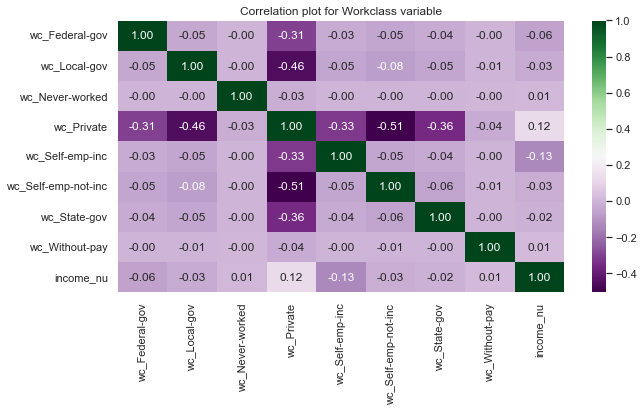

Figure 2.10: Correlation plot for Workclass variable


In [96]:
plt.figure(figsize=(10,5))
sns.heatmap(df2[['wc_Federal-gov','wc_Local-gov', 'wc_Never-worked', 'wc_Private', 'wc_Self-emp-inc','wc_Self-emp-not-inc','wc_State-gov', 'wc_Without-pay', 'income_nu']].corr(method='spearman'),
 annot=True, fmt='.2f', cmap='PRGn');
plt.title('Correlation plot for Workclass variable')
plt.show() 
print('Figure 2.10: Correlation plot for Workclass variable') 

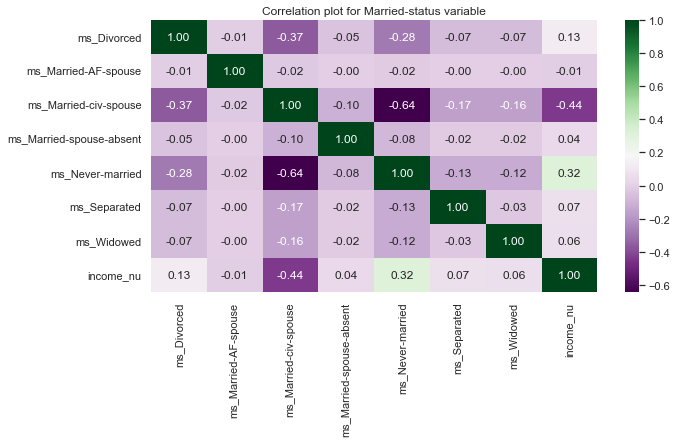

Figure 2.11: Correlation plot for Married-status variable


In [97]:
plt.figure(figsize=(10,5))
sns.heatmap(df2[['ms_Divorced','ms_Married-AF-spouse', 'ms_Married-civ-spouse', 'ms_Married-spouse-absent', 'ms_Never-married','ms_Separated','ms_Widowed', 'income_nu']].corr(method='spearman'),
 annot=True, fmt='.2f', cmap='PRGn');
plt.title('Correlation plot for Married-status variable')
plt.show() 
print('Figure 2.11: Correlation plot for Married-status variable') 

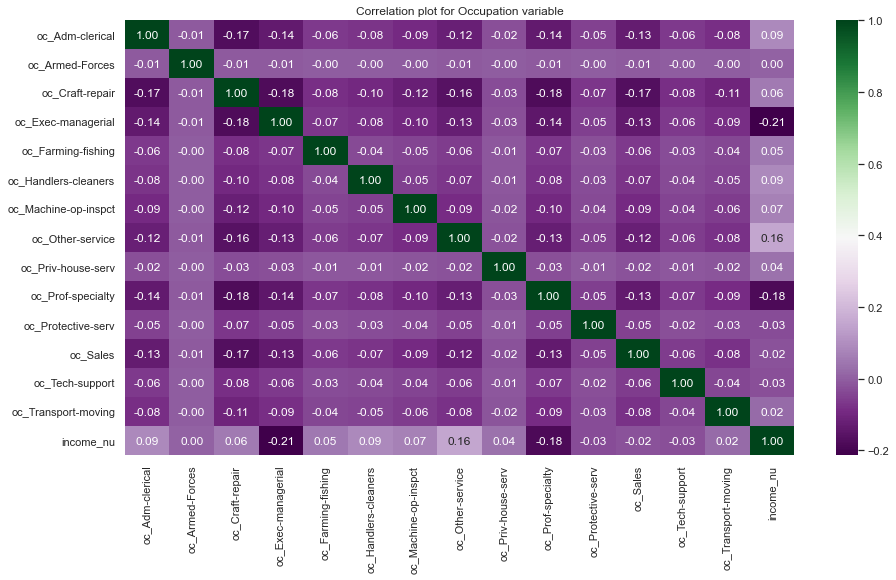

Figure 2.12: Correlation plot for Occupation variable


In [98]:
plt.figure(figsize=(15,8))
sns.heatmap(df2[['oc_Adm-clerical','oc_Armed-Forces', 'oc_Craft-repair', 'oc_Exec-managerial', 'oc_Farming-fishing','oc_Handlers-cleaners',
'oc_Machine-op-inspct', 'oc_Other-service','oc_Priv-house-serv','oc_Prof-specialty','oc_Protective-serv','oc_Sales','oc_Tech-support',
'oc_Transport-moving','income_nu']].corr(method='spearman'),annot=True, fmt='.2f', cmap='PRGn');
plt.title('Correlation plot for Occupation variable')
plt.show() 
print('Figure 2.12: Correlation plot for Occupation variable') 

Correlation analysis shows that for target variable, there are no strong correlation with any of ther other variables. The moaximum absolute values found in the correlation analysis are 0.44 for ms_Married-civ-spouse, 0.4 for re_Husband and 0.32 for education-num variables. All the variables are considered for the machine learning model because there are no prominent variables.

In [99]:
# Separating dependent and independent variables
x2 =df2.drop(columns=['income_nu','income'])
y2 = df2.income_nu

# Scaling dependent variables using standard scaler
ssc = StandardScaler()
x2 = ssc.fit_transform(x2)


In [100]:
# Separate dataset to train and test sets with 80% to train and 20% to test
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size=0.2, random_state=3)

### Machine Learning model to predict whether an individual is going to earn more than $50,000 annually
There are four classification models, Logistic Regression, Support Vector Machine, Random Forest and Gaussian Naive Bayes and two Artificial Neural Network models

#### Classification models

##### Logistic Regression

              precision    recall  f1-score   support

         0.0       0.74      0.60      0.66      1579
         1.0       0.88      0.93      0.90      4902

    accuracy                           0.85      6481
   macro avg       0.81      0.76      0.78      6481
weighted avg       0.84      0.85      0.84      6481

Figure 2.13: Confusion Matrix for Logistic Regression


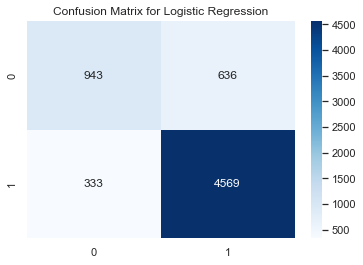

In [101]:
model_lr = LogisticRegression(random_state=0)
model_lr.fit(x2_train, y2_train)
pred_lr = model_lr.predict(x2_test)
matrix = confusion_matrix(y2_test, pred_lr)
sns.heatmap(matrix, annot=True,fmt='d',cmap="Blues");
print(classification_report(y2_test,pred_lr))
plt.title('Confusion Matrix for Logistic Regression')
print('Figure 2.13: Confusion Matrix for Logistic Regression') 


The Logistic Reggression model has accuracy 0.85, which means that 85% of the sample has been correctly classified.
F1 score is 0.9 shows that for the lable one, classification is performing well. However for lable zero, just above average F1 score. High precision of 0.88 and recall 0.9 shows that high proportion of class one values of the output have identified by the model correcly within the class and between classes. For the class zero scores are little lower.

##### Support Vector Machine

              precision    recall  f1-score   support

         0.0       0.74      0.58      0.65      1579
         1.0       0.87      0.93      0.90      4902

    accuracy                           0.85      6481
   macro avg       0.81      0.75      0.77      6481
weighted avg       0.84      0.85      0.84      6481

Figure 2.14: Confusion Matrix for Supported Vector Machine


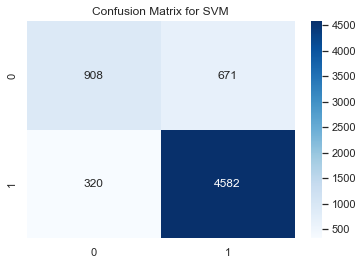

In [102]:
model_svm = svm.SVC(kernel='poly')
model_svm.fit(x2_train, y2_train)
pred_svm = model_svm.predict(x2_test)
matrix = confusion_matrix(y2_test, pred_svm)
sns.heatmap(matrix, annot=True,fmt='d',cmap="Blues");
print(classification_report(y2_test,pred_svm))
plt.title('Confusion Matrix for SVM')
print('Figure 2.14: Confusion Matrix for Supported Vector Machine')

The Suported Vector machine Model has accuracy 0.85, which means that 85% of the sample has been correctly classified.
F1 score is 0.9 shows that for the class one, classification is performing well. However for lable zero, just above average F1 score. High precision of 0.87 and recall 0.93 shows that high proportion of class one values of the output have identified by the model correcly within the class and between classes. For the class zero scores are little lower. All the model evaaluation parameter values are approximately equal to the respective values from Logistic Regression.

##### Random Forest Classifier

              precision    recall  f1-score   support

         0.0       0.73      0.62      0.67      1579
         1.0       0.88      0.93      0.90      4902

    accuracy                           0.85      6481
   macro avg       0.81      0.77      0.79      6481
weighted avg       0.84      0.85      0.85      6481

Figure 2.15: Confusion Matrix for Random Forest Classifier


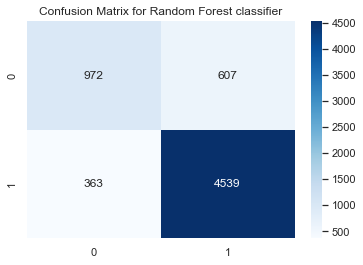

In [103]:

model_rf = RandomForestClassifier()
model_rf.fit(x2_train, y2_train)
pred_rf = model_rf.predict(x2_test)
matrix = confusion_matrix(y2_test, pred_rf)
sns.heatmap(matrix, annot=True,fmt='d',cmap="Blues");
print(classification_report(y2_test,pred_rf))
plt.title('Confusion Matrix for Random Forest classifier')
print('Figure 2.15: Confusion Matrix for Random Forest Classifier')

The Random Forest classifier has accuracy 0.85, which means that 85% of the sample has been correctly classified.
F1 score is 0.9 shows that for the class one, classification is performing well. However for lable zero, just above average F1 score. High precision of 0.88 and recall 0.93 shows that high proportion of class one values of the output have identified by the model correcly within the class and between classes. For the class zero scores are little lower. All the model evaaluation parameter values are approximately equal to the respective values from Logistic Regression and Suported Vector Machine.

##### Naive Bayes Classifier

              precision    recall  f1-score   support

         0.0       0.34      0.97      0.51      1579
         1.0       0.97      0.40      0.57      4902

    accuracy                           0.54      6481
   macro avg       0.66      0.68      0.54      6481
weighted avg       0.82      0.54      0.56      6481

Figure 2.16: Confusion Matrix for Naive Bayes Classifier


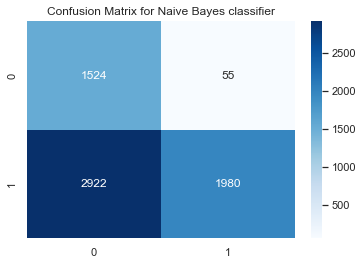

In [104]:
model_gnb = GaussianNB()
model_gnb.fit(x2_train, y2_train)
pred_gnb = model_gnb.predict(x2_test)
matrix = confusion_matrix(y2_test, pred_gnb)
sns.heatmap(matrix, annot=True,fmt='d',cmap="Blues")
print(classification_report(y2_test,pred_gnb))
plt.title('Confusion Matrix for Naive Bayes classifier')
print('Figure 2.16: Confusion Matrix for Naive Bayes Classifier')

The Gaussian Naive Bayes Model has accuracy 0.54, which means that only 54% of the sample has been correctly classified.
F1 score of 0.57 and 0.51 for class one and zero shows that when considering both output cases classification only has average performance. High value of 0.97 precision shows that the model is performing better for one output lable. However, low value of precision of 0.34 suggest that for the other class, the model is not perorming well. The confusion matrix shows there are 2922 wrong classifications for class lable 1. The low recall value for class one and low precision for class zero explains the average accuracy of the model.

              precision    recall  f1-score   support

         0.0       0.82      0.44      0.57      1579
         1.0       0.84      0.97      0.90      4902

    accuracy                           0.84      6481
   macro avg       0.83      0.70      0.74      6481
weighted avg       0.84      0.84      0.82      6481

Figure 2.17: Confusion Matrix for Ada Boost Classifier


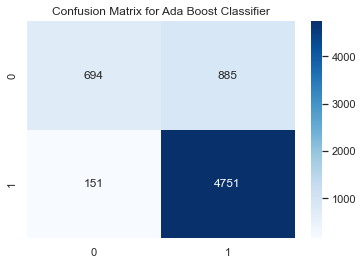

In [105]:
model=AdaBoostClassifier(learning_rate= 0.15,n_estimators= 25)
model.fit(x2_train,y2_train)
y_pred=model.predict(x2_test)
print(classification_report(y2_test,y_pred))
matrix = confusion_matrix(y2_test, y_pred)
sns.heatmap(matrix, annot=True,fmt='d',cmap="Blues");
plt.title('Confusion Matrix for Ada Boost Classifier')
print('Figure 2.17: Confusion Matrix for Ada Boost Classifier')


The Ada Boost classifier Model has accuracy 0.84, which means that only 84% of the sample has been correctly classified.
F1 score of 0.9 for class one and 0.57 for class zero shows that performance deference in the two classes obeserved in Logistic reggeresion, SVM and Random Forrest is same in this model. High value of 0.84 and 0.82 for class one and class zero respectively, shows that the model is performing better when identifing true positives model performes better. However, low value of recall of 0.34 for class zero suggest that for proportion of actual positives are not high. The confusion matrix shows there are 2922 wrong classifications for class lable 1.

When comparing classification models, four models are performing well and one model, the Naive Bayes mode, is not performing well for one output lable of the target class reducing the accuracy of that model. F1 score is almost same for first three models, Logistic Reggression, Supported Vector Machine and Random Forest, fairly good for AdaBoost Classifier. However, average for the Naive bayes model. Accuracy is better in Logistic Reggression, Random Forest and Supported Vector Machine. Naive bayes classifier has the highest precision value of .97 for for class one and highest recall of .97 for class zero, eventhough all the other metrics are have low values. Ada Boost classifier also has 0.97 recall for class one. The Random Forest classier has the highest performance, even though it is only a slight difference with other two top classifiers.

#### Artificial Neural Network models

Two Artificial Neural Network models have trained with the input layer, two hidden layers, and the output layer. Model are differnt in the number of nodes in the hidden layers.

##### Artificial Neural Network model one

In [106]:
# Initialise ANN
model_ann1 = tf.keras.models.Sequential()
# Add two hidden layers
model_ann1.add(tf.keras.layers.Dense(units=20, activation = 'relu'))
model_ann1.add(tf.keras.layers.Dense(units=10, activation = 'relu'))
# Add output layer
model_ann1.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))
model_ann1.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

history =model_ann1.fit(x2_train,y2_train, validation_data = (x2_test,y2_test), batch_size = 50, epochs = 25)
loss, acc = model_ann1.evaluate(x2_test,y2_test)
print('Accuracy: %f'%(acc*100))

Epoch 1/25


2022-07-22 09:48:52.389299: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


519/519 [==============================] - 1s 1ms/step - loss: 0.3735 - accuracy: 0.8272 - val_loss: 0.3310 - val_accuracy: 0.8480
Epoch 2/25
519/519 [==============================] - 1s 1ms/step - loss: 0.3196 - accuracy: 0.8519 - val_loss: 0.3240 - val_accuracy: 0.8497
Epoch 3/25
519/519 [==============================] - 1s 1ms/step - loss: 0.3142 - accuracy: 0.8544 - val_loss: 0.3231 - val_accuracy: 0.8480
Epoch 4/25
519/519 [==============================] - 1s 1ms/step - loss: 0.3108 - accuracy: 0.8548 - val_loss: 0.3218 - val_accuracy: 0.8479
Epoch 5/25
519/519 [==============================] - 1s 1ms/step - loss: 0.3082 - accuracy: 0.8559 - val_loss: 0.3236 - val_accuracy: 0.8488
Epoch 6/25
519/519 [==============================] - 1s 1ms/step - loss: 0.3061 - accuracy: 0.8581 - val_loss: 0.3216 - val_accuracy: 0.8505
Epoch 7/25
519/519 [==============================] - 1s 1ms/step - loss: 0.3042 - accuracy: 0.8584 - val_loss: 0.3221 - val_accuracy: 0.8514
Epoch 8/25
519/51

Figure 2.18: Performance of ANN


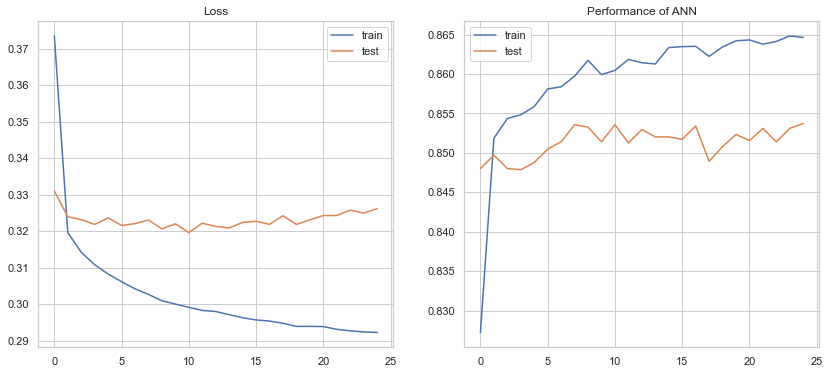

In [107]:
f = plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()

plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'],label = 'train')
plt.plot(history.history['val_accuracy'],label = 'test')
plt.legend()

plt.title('Performance of ANN')
print('Figure 2.18: Performance of ANN')

##### Artificial Neural Network model two

In [108]:
# Initialise ANN
model_ann2 = tf.keras.models.Sequential()
# Add two hidden layers
model_ann2.add(tf.keras.layers.Dense(units=6, activation = 'relu'))
model_ann2.add(tf.keras.layers.Dense(units=6, activation = 'relu'))
# Add output layer
model_ann2.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))
model_ann2.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

history =model_ann2.fit(x2_train,y2_train, validation_data = (x2_test,y2_test), batch_size = 30, epochs = 20)
loss, acc = model_ann2.evaluate(x2_test,y2_test)
print('Accuracy: %f'%(acc*100))


Epoch 1/20
865/865 [==============================] - 1s 1ms/step - loss: 0.4136 - accuracy: 0.7875 - val_loss: 0.3391 - val_accuracy: 0.8452
Epoch 2/20
865/865 [==============================] - 1s 972us/step - loss: 0.3243 - accuracy: 0.8488 - val_loss: 0.3245 - val_accuracy: 0.8525
Epoch 3/20
865/865 [==============================] - 1s 975us/step - loss: 0.3160 - accuracy: 0.8536 - val_loss: 0.3218 - val_accuracy: 0.8523
Epoch 4/20
865/865 [==============================] - 1s 974us/step - loss: 0.3131 - accuracy: 0.8545 - val_loss: 0.3213 - val_accuracy: 0.8513
Epoch 5/20
865/865 [==============================] - 1s 969us/step - loss: 0.3115 - accuracy: 0.8556 - val_loss: 0.3215 - val_accuracy: 0.8522
Epoch 6/20
865/865 [==============================] - 1s 971us/step - loss: 0.3102 - accuracy: 0.8554 - val_loss: 0.3209 - val_accuracy: 0.8536
Epoch 7/20
865/865 [==============================] - 1s 966us/step - loss: 0.3091 - accuracy: 0.8570 - val_loss: 0.3205 - val_accuracy: 0

Figure 2.19: Performance of ANN


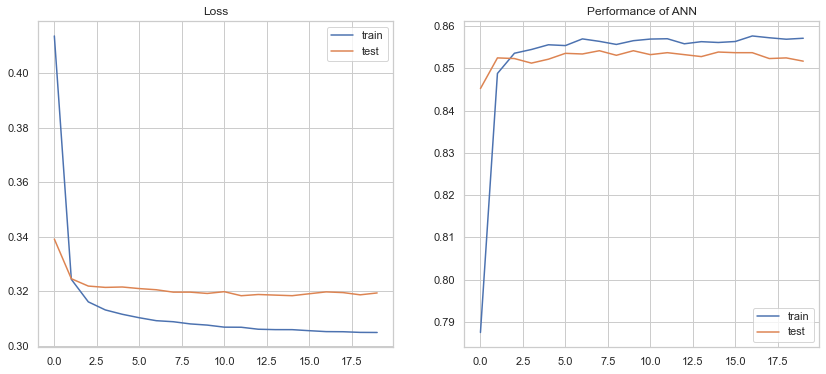

In [109]:
f = plt.figure(figsize=(14,6))

plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()

plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'],label = 'train')
plt.plot(history.history['val_accuracy'],label = 'test')
plt.legend()
plt.title('Performance of ANN')
print('Figure 2.19: Performance of ANN')

Both Artificial Neural Network (ANN) models are performing with accuracy 85% to 86% which can be considered as good performance for a ANN model.  Accuracy of the model_ann1 ossilates aroung 86% while model_ann2 stabalises at 86%.

### Optimisation

- Top three models from the classification are further optimised.

#### Step 1

First attempt to optimise models are done dropping low correlated variables from the input data.

In [110]:
# Drop variables with correlation between 0.1 and -0.1 from dataset and select dependent variables 
x2 =df2.drop(columns=['income_nu','income','fnlwgt', 're_Other-relative','wc_Federal-gov','wc_Local-gov', 'wc_Never-worked','wc_Self-emp-not-inc','wc_State-gov', 'wc_Without-pay',
'ms_Married-AF-spouse', 'ms_Married-spouse-absent','ms_Separated','ms_Widowed','country_America','country_Asia', 'country_Canada', 'country_Europe', 'country_Other',
'country_United-States','oc_Adm-clerical','oc_Armed-Forces', 'oc_Craft-repair', 'oc_Farming-fishing','oc_Handlers-cleaners','oc_Machine-op-inspct','oc_Priv-house-serv',
'oc_Protective-serv','oc_Sales','oc_Tech-support','oc_Transport-moving'])
y = df2.income_nu

# Scaling dependent variables using standard scaler
ssc = StandardScaler()
x2 = ssc.fit_transform(x2)

# Separate dataset to train and test sets with 80% to train and 20% to test
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size=0.2, random_state=3)

              precision    recall  f1-score   support

         0.0       0.74      0.57      0.64      1579
         1.0       0.87      0.93      0.90      4902

    accuracy                           0.84      6481
   macro avg       0.80      0.75      0.77      6481
weighted avg       0.84      0.84      0.84      6481

Figure 2.20: Confusion Matrix for Logistic Reggression


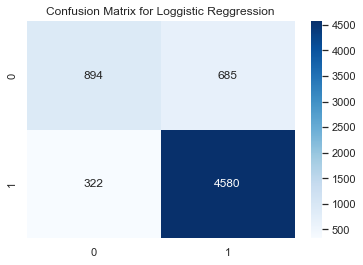

In [111]:
model_lr_1 = LogisticRegression(random_state=0)
model_lr_1.fit(x2_train, y2_train)
pred_lr_op = model_lr_1.predict(x2_test)

print(classification_report(y2_test,pred_lr_op))
matrix = confusion_matrix(y2_test, pred_lr_op)
sns.heatmap(matrix, annot=True,fmt='d',cmap="Blues");
plt.title('Confusion Matrix for Loggistic Reggression')
print('Figure 2.20: Confusion Matrix for Logistic Reggression')

              precision    recall  f1-score   support

         0.0       0.77      0.54      0.63      1579
         1.0       0.86      0.95      0.90      4902

    accuracy                           0.85      6481
   macro avg       0.81      0.74      0.77      6481
weighted avg       0.84      0.85      0.84      6481

Figure 2.21: Confusion Matrix for SVM Classifier


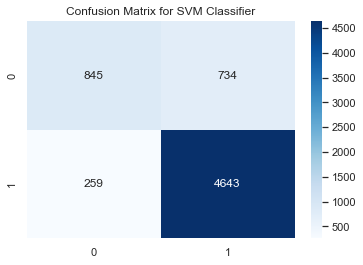

In [112]:
model_svm_1 = svm.SVC(kernel='poly')
model_svm_1.fit(x2_train, y2_train)
pred_svm_op = model_svm_1.predict(x2_test)

print(classification_report(y2_test,pred_svm_op))
matrix = confusion_matrix(y2_test, pred_svm_op)
sns.heatmap(matrix, annot=True,fmt='d',cmap="Blues");
plt.title('Confusion Matrix for SVM Classifier')
print('Figure 2.21: Confusion Matrix for SVM Classifier')


              precision    recall  f1-score   support

         0.0       0.71      0.60      0.65      1579
         1.0       0.88      0.92      0.90      4902

    accuracy                           0.84      6481
   macro avg       0.80      0.76      0.78      6481
weighted avg       0.84      0.84      0.84      6481

Figure 2.22: Confusion Matrix for Random Forest Classifier


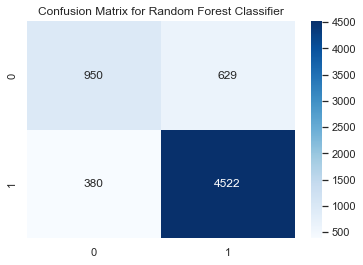

In [113]:
model_rf_1 = RandomForestClassifier()
model_rf_1.fit(x2_train, y2_train)
pred_rf_op = model_rf_1.predict(x2_test)

print(classification_report(y2_test,pred_rf_op))
matrix = confusion_matrix(y2_test, pred_rf_op)
sns.heatmap(matrix, annot=True,fmt='d',cmap="Blues");
plt.title('Confusion Matrix for Random Forest Classifier')
print('Figure 2.22: Confusion Matrix for Random Forest Classifier')


This step did not increase the performance of the models therfore, this step is not carried forward.

#### Step 2

Different scaling method used to transform data to increase perofrmance.


In [114]:
# Select dependent variables 
x2 =df2.drop(columns=['income_nu','income','fnlwgt'])
y = df2.income_nu

# RobustScaler, MinMaxScaler,Normalizer was tried
#x2 = StandardScaler().fit_transform(x2)
#x2 = MinMaxScaler().fit_transform(x2)
#x2 =  Normalizer().fit_transform(x2)
# Scaling dependent variables using minmax scaler
x2 =  MinMaxScaler().fit_transform(x2)

# Separate dataset to train and test sets with 80% to train and 20% to test
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size=0.2, random_state=3)

              precision    recall  f1-score   support

         0.0       0.74      0.59      0.66      1579
         1.0       0.88      0.93      0.90      4902

    accuracy                           0.85      6481
   macro avg       0.81      0.76      0.78      6481
weighted avg       0.84      0.85      0.84      6481

Figure 2.23: Confusion Matrix for Logistic Reggression Classifier


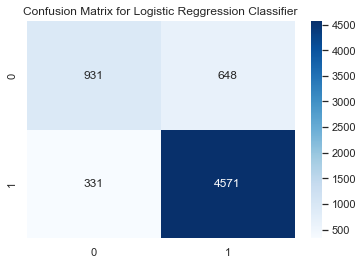

In [115]:
model_lr= LogisticRegression(random_state=0, max_iter = 1000)
model_lr.fit(x2_train, y2_train)
pred_lr_op = model_lr.predict(x2_test)

print(classification_report(y2_test,pred_lr_op))
matrix = confusion_matrix(y2_test, pred_lr_op)
sns.heatmap(matrix, annot=True,fmt='d',cmap="Blues");
plt.title('Confusion Matrix for Logistic Reggression Classifier')
print('Figure 2.23: Confusion Matrix for Logistic Reggression Classifier')

              precision    recall  f1-score   support

         0.0       0.75      0.57      0.65      1579
         1.0       0.87      0.94      0.90      4902

    accuracy                           0.85      6481
   macro avg       0.81      0.76      0.78      6481
weighted avg       0.84      0.85      0.84      6481

Figure 2.24: Confusion Matrix for SVM Classifier


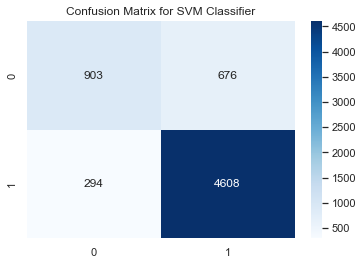

In [116]:
model_svm = svm.SVC(kernel='poly')
model_svm.fit(x2_train, y2_train)
pred_svm_op = model_svm.predict(x2_test)

print(classification_report(y2_test,pred_svm_op))
matrix = confusion_matrix(y2_test, pred_svm_op)
sns.heatmap(matrix, annot=True,fmt='d',cmap="Blues");
plt.title('Confusion Matrix for SVM Classifier')
print('Figure 2.24: Confusion Matrix for SVM Classifier')

              precision    recall  f1-score   support

         0.0       0.72      0.61      0.66      1579
         1.0       0.88      0.92      0.90      4902

    accuracy                           0.85      6481
   macro avg       0.80      0.77      0.78      6481
weighted avg       0.84      0.85      0.84      6481

Figure 2.25: Confusion Matrix for Random Forest Classifier


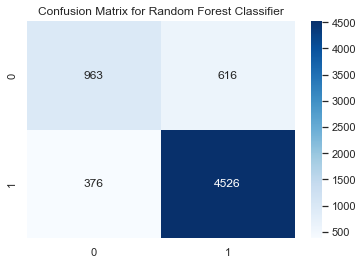

In [117]:
model_rf = RandomForestClassifier()
model_rf.fit(x2_train, y2_train)
pred_rf_op = model_rf.predict(x2_test)

print(classification_report(y2_test,pred_rf_op))
matrix = confusion_matrix(y2_test, pred_rf_op)
sns.heatmap(matrix, annot=True,fmt='d',cmap="Blues");
plt.title('Confusion Matrix for Random Forest Classifier')
print('Figure 2.25: Confusion Matrix for Random Forest Classifier')

### Hyper parameter tuning


In [118]:
# Depending on the supported solvers for penalty parameter, different set of parameter grids are defined
param_grid = [    
    {'penalty' : ['none', 'l2'],
    'solver' : ['lbfgs','newton-cg','sag','saga'],
    'max_iter' : [1000,2000],
    'tol':[0.0001, 0.001], 
    'C':[1.0,2.0,4.0, 0.5]
    },
    {'penalty' : ['l1' ],
    'solver' : ['saga','liblinear'],
    'max_iter' : [1000,2000],
    'dual': [False],
    'tol':[0.0001, 0.001], 
    'C':[1.0,2.0,4.0,0.5], 
    'fit_intercept':[True],
    'intercept_scaling':[1]
    },
      {'penalty' : ['elasticnet'],
    'solver' : ['saga'],
    'max_iter' : [1000,2000],
    'tol':[0.0001, 0.001], 
    'C':[1.0,2.0,4.0,5.0,]
    }
]

In [119]:
clf = GridSearchCV(estimator = model_lr, param_grid = param_grid)
best_model = clf.fit(x2_train, y2_train)
print('Best Penalty:', best_model.best_estimator_.get_params() ['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('The best score across ALL searched params:\n',best_model.best_score_)
print('The best parameters across ALL searched params:\n',best_model.best_params_)

/Users/prasad/opt/anaconda3/envs/HelloWorld/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasad/opt/anaconda3/envs/HelloWorld/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasad/opt/anaconda3/envs/HelloWorld/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasad/opt/anaconda3/envs/HelloWorld/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/prasad/opt/anaconda3/envs/HelloWorld/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1

In [ ]:
model_lr = LogisticRegression(max_iter = 1000,penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None)
model_lr.fit(x2_train, y2_train)
pred_lr_op = model_lr.predict(x2_test)

print(classification_report(y2_test,pred_lr_op))
matrix = confusion_matrix(y2_test, pred_lr_op)

In [ ]:
best_predicted_values = best_model.predict(x2_test)
accuracy_score(best_predicted_values, y2_test)

In [ ]:
clf = GridSearchCV(estimator = model_lr, param_grid = param_grid)
best_model = clf.fit(x2_train, y2_train)
print('Best Penalty:', best_model.best_estimator_.get_params() ['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('The best score across ALL searched params:\n',best_model.best_score_)
print('The best parameters across ALL searched params:\n',best_model.best_params_)

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x2_train, y2_train)
clf = GridSearchCV(estimator=svc,param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf','poly')})
best_model = clf.fit(x2_train, y2_train)

In [ ]:
best_predicted_values = best_model.predict(x2_test)
accuracy_score(best_predicted_values, y2_test)

In [ ]:
# Hyperparameter Optimization
parameters = {
    'n_estimators' : [10, 50, 100, 300],
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10, 50], 
    'min_samples_split': [2, 3, 50, 100]
}

# Run the grid search
grid_obj = GridSearchCV(model_rf, parameters)
grid_obj = grid_obj.fit(x2_train, y2_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(x2_train, y2_train)

print('The best score across ALL searched params:\n',grid_obj.best_score_)
print('The best parameters across ALL searched params:\n',grid_obj.best_params_)

In [ ]:
best_predicted_values = clf.predict(x2_test)
accuracy_score(best_predicted_values, y2_test)

### Referencese 

NHS (2022), Understanding your health and weight: Body mass index (BMI). Available at: URL (July 18, 2022).https://www.nhsinform.scot/healthy-living/food-and-nutrition/healthy-eating-and-weight-loss/understanding-your-health-and-weight-body-mass-index-bmi

scikit-learn (2022), 6.3. Preprocessing data. Available at: URL(July 20, 2022). https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data

scikit-learn (2022), sklearn.model_selection.GridSearchCV. Available at: URL(July 21, 2022). https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html